<a href="https://colab.research.google.com/github/ZahraBehzad/learn-CNN/blob/main/grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
120/120 - 5s - 38ms/step - loss: 0.0094
Epoch 2/200
120/120 - 2s - 16ms/step - loss: 0.0014
Epoch 3/200
120/120 - 0s - 3ms/step - loss: 0.0011
Epoch 4/200
120/120 - 1s - 5ms/step - loss: 9.7862e-04
Epoch 5/200
120/120 - 0s - 3ms/step - loss: 8.9864e-04
Epoch 6/200
120/120 - 0s - 3ms/step - loss: 9.4458e-04
Epoch 7/200
120/120 - 1s - 5ms/step - loss: 8.3804e-04
Epoch 8/200
120/120 - 1s - 6ms/step - loss: 8.0002e-04
Epoch 9/200
120/120 - 0s - 4ms/step - loss: 7.5320e-04
Epoch 10/200
120/120 - 1s - 5ms/step - loss: 7.2980e-04
Epoch 11/200
120/120 - 0s - 4ms/step - loss: 7.4920e-04
Epoch 12/200
120/120 - 1s - 5ms/step - loss: 8.6006e-04
Epoch 13/200
120/120 - 0s - 4ms/step - loss: 7.0470e-04
Epoch 14/200
120/120 - 0s - 3ms/step - loss: 7.3391e-04
Epoch 15/200
120/120 - 1s - 5ms/step - loss: 7.4837e-04
Epoch 16/200
120/120 - 0s - 3ms/step - loss: 7.3571e-04
Epoch 17/200
120/120 - 0s - 3ms/step - loss: 6.9098e-04
Epoch 18/200
120/120 - 0s - 3ms/step - loss: 7.3849e-04
Epoch 19/20

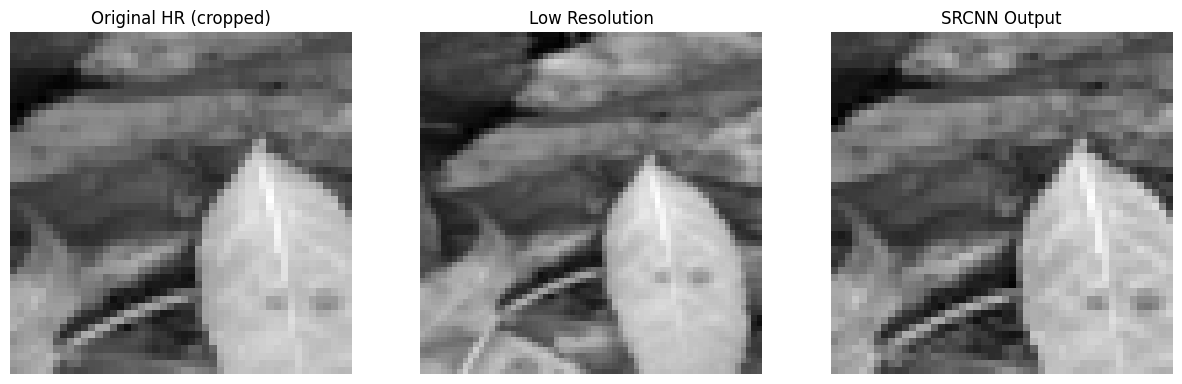

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول زیر هشتاد درصد داده ها برای آموزش و بیست درصد برای ولیدیشن استفاده شده است.

Epoch 1/200
Batch 0 - Training Loss: 0.3506
Batch 10 - Training Loss: 0.0606
Batch 20 - Training Loss: 0.0356
Batch 30 - Training Loss: 0.0261
Batch 40 - Training Loss: 0.0210
Batch 50 - Training Loss: 0.0178
Batch 60 - Training Loss: 0.0153
Batch 70 - Training Loss: 0.0135
Batch 80 - Training Loss: 0.0123
Batch 90 - Training Loss: 0.0112
96/96 - 17s - 175ms/step - loss: 0.0107 - val_loss: 0.0016
Epoch 2/200
Batch 0 - Training Loss: 0.0025
Batch 10 - Training Loss: 0.0021
Batch 20 - Training Loss: 0.0017
Batch 30 - Training Loss: 0.0019
Batch 40 - Training Loss: 0.0018
Batch 50 - Training Loss: 0.0016
Batch 60 - Training Loss: 0.0017
Batch 70 - Training Loss: 0.0016
Batch 80 - Training Loss: 0.0015
Batch 90 - Training Loss: 0.0015
96/96 - 20s - 206ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/200
Batch 0 - Training Loss: 0.0017
Batch 10 - Training Loss: 0.0012
Batch 20 - Training Loss: 0.0014
Batch 30 - Training Loss: 0.0014
Batch 40 - Training Loss: 0.0013
Batch 50 - Training Loss

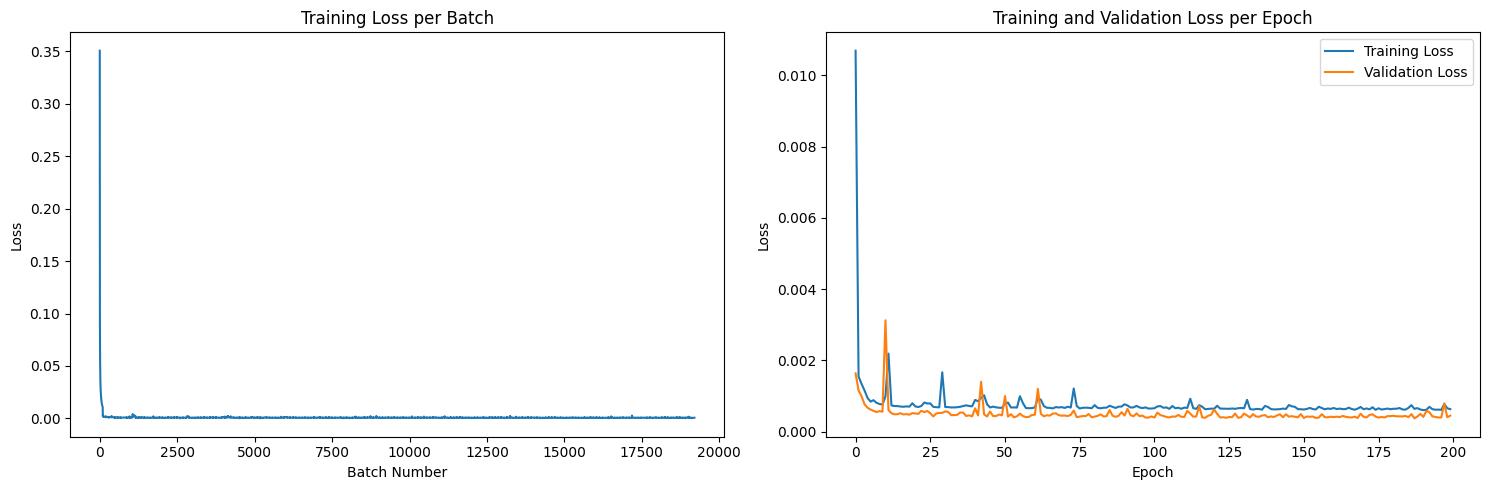

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

Test Results:
PSNR: 37.45355261222775
SSIM: 0.9696953019845783


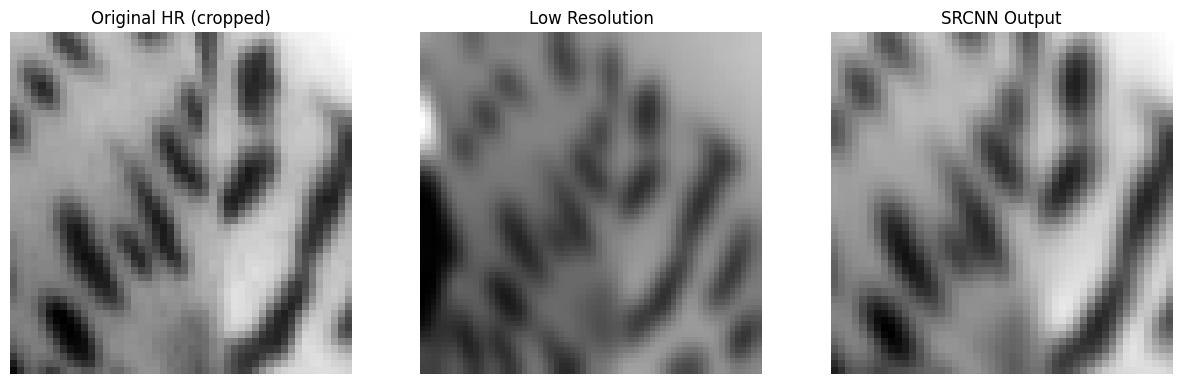

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# کلاس Callback برای ذخیره Loss هر Batch
class BatchLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        if batch % 10 == 0:  # چاپ هر 10 Batch
            print(f"Batch {batch} - Training Loss: {logs['loss']:.4f}")

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل با Validation Split و Callback
batch_loss_callback = BatchLossCallback()
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=200,
    verbose=2,
    validation_split=0.2,
    callbacks=[batch_loss_callback]
)

# رسم نمودار Lossها
plt.figure(figsize=(15, 5))

# نمودار Loss هر Batch
plt.subplot(1, 2, 1)
plt.plot(batch_loss_callback.batch_losses)
plt.title('Training Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')

# نمودار Loss و Validation Loss هر Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("\nTest Results:")
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

در سلول زیر هشتاد درصد داده ها برای آموزش و بیست درصد برای تست استفاده شده است.

Epoch 1/200
Batch 0 - Training Loss: 0.2891
Batch 10 - Training Loss: 0.0479
Batch 20 - Training Loss: 0.0289
Batch 30 - Training Loss: 0.0212
Batch 40 - Training Loss: 0.0175
Batch 50 - Training Loss: 0.0150
Batch 60 - Training Loss: 0.0134
Batch 70 - Training Loss: 0.0118
Batch 80 - Training Loss: 0.0110
Batch 90 - Training Loss: 0.0102
96/96 - 3s - 28ms/step - loss: 0.0099
Epoch 2/200
Batch 0 - Training Loss: 0.0037
Batch 10 - Training Loss: 0.0029
Batch 20 - Training Loss: 0.0028
Batch 30 - Training Loss: 0.0029
Batch 40 - Training Loss: 0.0028
Batch 50 - Training Loss: 0.0027
Batch 60 - Training Loss: 0.0026
Batch 70 - Training Loss: 0.0025
Batch 80 - Training Loss: 0.0024
Batch 90 - Training Loss: 0.0023
96/96 - 1s - 12ms/step - loss: 0.0022
Epoch 3/200
Batch 0 - Training Loss: 0.0011
Batch 10 - Training Loss: 0.0014
Batch 20 - Training Loss: 0.0015
Batch 30 - Training Loss: 0.0013
Batch 40 - Training Loss: 0.0014
Batch 50 - Training Loss: 0.0014
Batch 60 - Training Loss: 0.0014


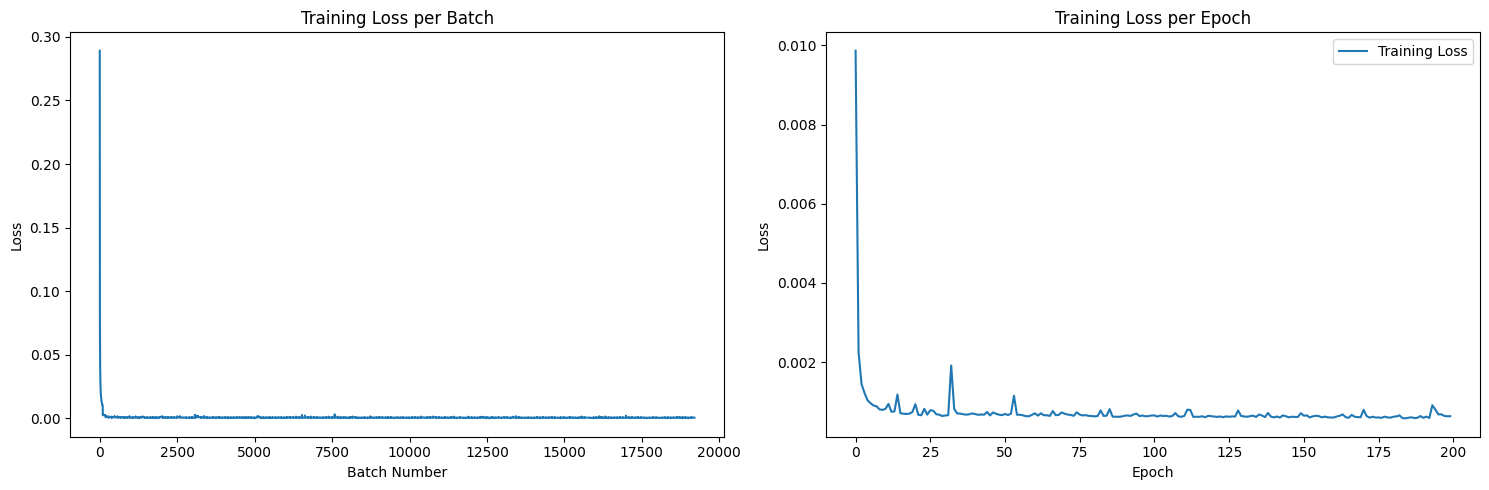

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

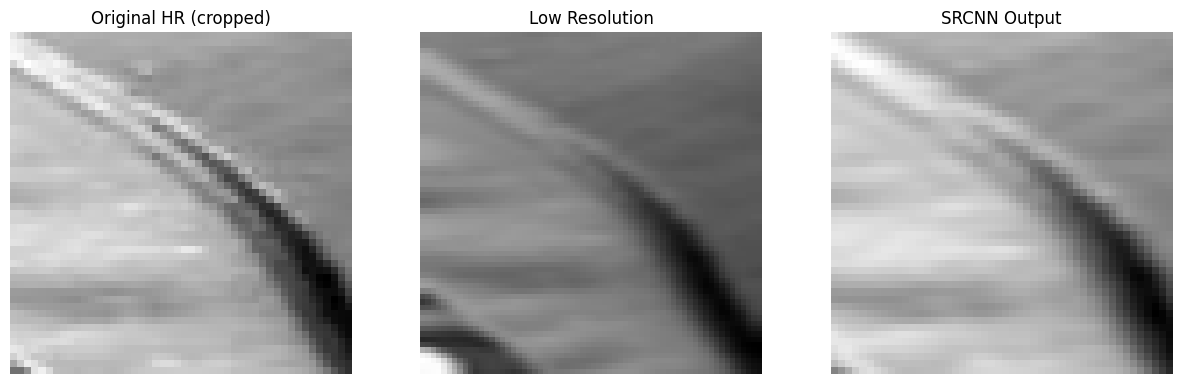

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images
    y = np.expand_dims(np.array(y), -1)  # HR cropped images
    return x, y

# Callback برای ذخیره Loss هر Batch
class BatchLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        if batch % 10 == 0:
            print(f"Batch {batch} - Training Loss: {logs['loss']:.4f}")

# مسیر دیتاست
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8

# بارگذاری و تقسیم داده‌ها
x_all, y_all = load_dataset(hr_path, lr_path, target_size, crop)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

# ساخت مدل
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
batch_loss_callback = BatchLossCallback()
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=200,
    verbose=2,
    callbacks=[batch_loss_callback]
)

# رسم نمودار Loss‌ها
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(batch_loss_callback.batch_losses)
plt.title('Training Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ارزیابی مدل روی کل داده‌های تست
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    input_img = np.expand_dims(x_test[i], axis=0)
    gt_img = y_test[i, ..., 0]
    pred_img = model.predict(input_img)[0, ..., 0]

    psnr_scores.append(psnr(gt_img, pred_img, data_range=1.0))
    ssim_scores.append(ssim(gt_img, pred_img, data_range=1.0))

print("\nEvaluation on Test Set:")
print(f"Average PSNR: {np.mean(psnr_scores):.4f}")
print(f"Average SSIM: {np.mean(ssim_scores):.4f}")

# نمایش نمونه‌ای از نتایج تست
test_idx = np.random.randint(0, len(x_test))
test_lr = np.expand_dims(x_test[test_idx], axis=0)
test_hr = y_test[test_idx, ..., 0]
predicted = model.predict(test_lr)[0, ..., 0]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


ایپاک400

Epoch 1/400
Batch 0 - Training Loss: 0.2415
Batch 10 - Training Loss: 0.0456
Batch 20 - Training Loss: 0.0287
Batch 30 - Training Loss: 0.0209
Batch 40 - Training Loss: 0.0173
Batch 50 - Training Loss: 0.0150
Batch 60 - Training Loss: 0.0130
Batch 70 - Training Loss: 0.0114
Batch 80 - Training Loss: 0.0102
Batch 90 - Training Loss: 0.0093
96/96 - 3s - 27ms/step - loss: 0.0089 - val_loss: 0.0016
Epoch 2/400
Batch 0 - Training Loss: 0.0011
Batch 10 - Training Loss: 0.0013
Batch 20 - Training Loss: 0.0014
Batch 30 - Training Loss: 0.0017
Batch 40 - Training Loss: 0.0016
Batch 50 - Training Loss: 0.0015
Batch 60 - Training Loss: 0.0015
Batch 70 - Training Loss: 0.0015
Batch 80 - Training Loss: 0.0015
Batch 90 - Training Loss: 0.0015
96/96 - 0s - 4ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/400
Batch 0 - Training Loss: 0.0012
Batch 10 - Training Loss: 0.0009
Batch 20 - Training Loss: 0.0013
Batch 30 - Training Loss: 0.0013
Batch 40 - Training Loss: 0.0012
Batch 50 - Training Loss: 0.0

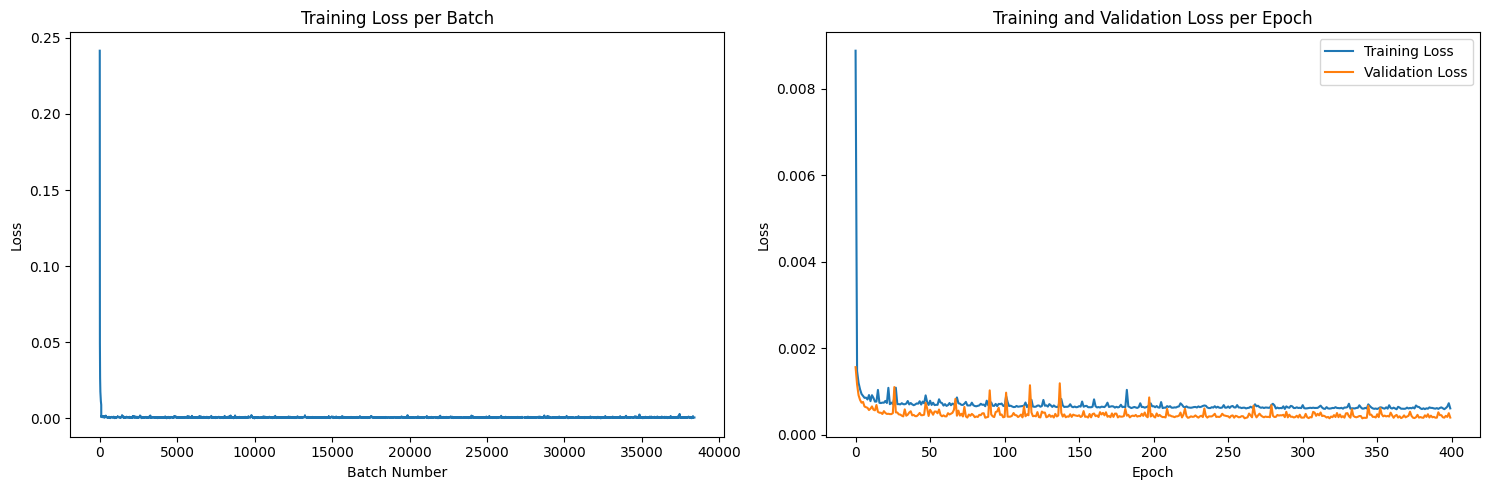

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

Test Results:
PSNR: 32.77832615256374
SSIM: 0.9131776483994083


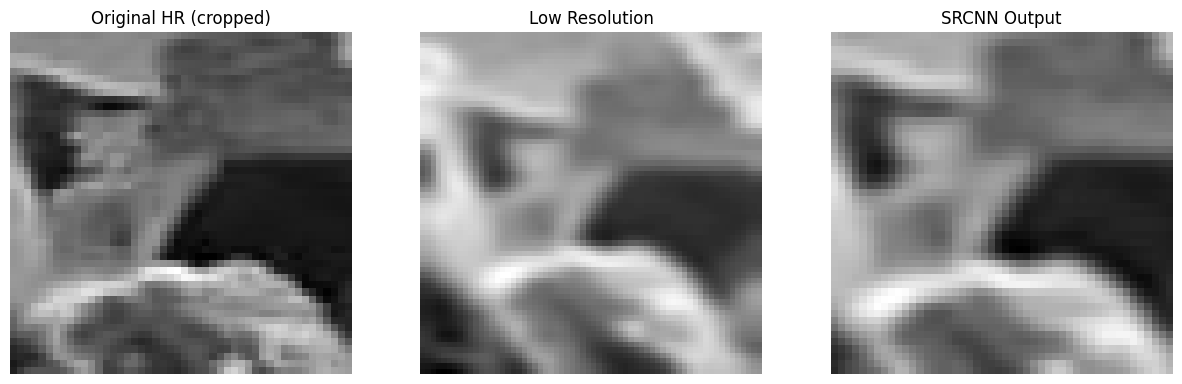

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# کلاس Callback برای ذخیره Loss هر Batch
class BatchLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        if batch % 10 == 0:  # چاپ هر 10 Batch
            print(f"Batch {batch} - Training Loss: {logs['loss']:.4f}")

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل با Validation Split و Callback
batch_loss_callback = BatchLossCallback()
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=400,
    verbose=2,
    validation_split=0.2,
    callbacks=[batch_loss_callback]
)

# رسم نمودار Lossها
plt.figure(figsize=(15, 5))

# نمودار Loss هر Batch
plt.subplot(1, 2, 1)
plt.plot(batch_loss_callback.batch_losses)
plt.title('Training Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')

# نمودار Loss و Validation Loss هر Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("\nTest Results:")
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

افزایش تعداد لایه ها

Epoch 1/200
Batch 0 - Training Loss: 0.3296
Batch 10 - Training Loss: 0.0805
Batch 20 - Training Loss: 0.0492
Batch 30 - Training Loss: 0.0356
Batch 40 - Training Loss: 0.0283
Batch 50 - Training Loss: 0.0238
Batch 60 - Training Loss: 0.0207
Batch 70 - Training Loss: 0.0183
Batch 80 - Training Loss: 0.0164
Batch 90 - Training Loss: 0.0149
96/96 - 19s - 201ms/step - loss: 0.0144 - val_loss: 0.0022
Epoch 2/200
Batch 0 - Training Loss: 0.0007
Batch 10 - Training Loss: 0.0017
Batch 20 - Training Loss: 0.0019
Batch 30 - Training Loss: 0.0020
Batch 40 - Training Loss: 0.0020
Batch 50 - Training Loss: 0.0021
Batch 60 - Training Loss: 0.0020
Batch 70 - Training Loss: 0.0019
Batch 80 - Training Loss: 0.0019
Batch 90 - Training Loss: 0.0018
96/96 - 22s - 230ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/200
Batch 0 - Training Loss: 0.0008
Batch 10 - Training Loss: 0.0014
Batch 20 - Training Loss: 0.0013
Batch 30 - Training Loss: 0.0012
Batch 40 - Training Loss: 0.0012
Batch 50 - Training Loss

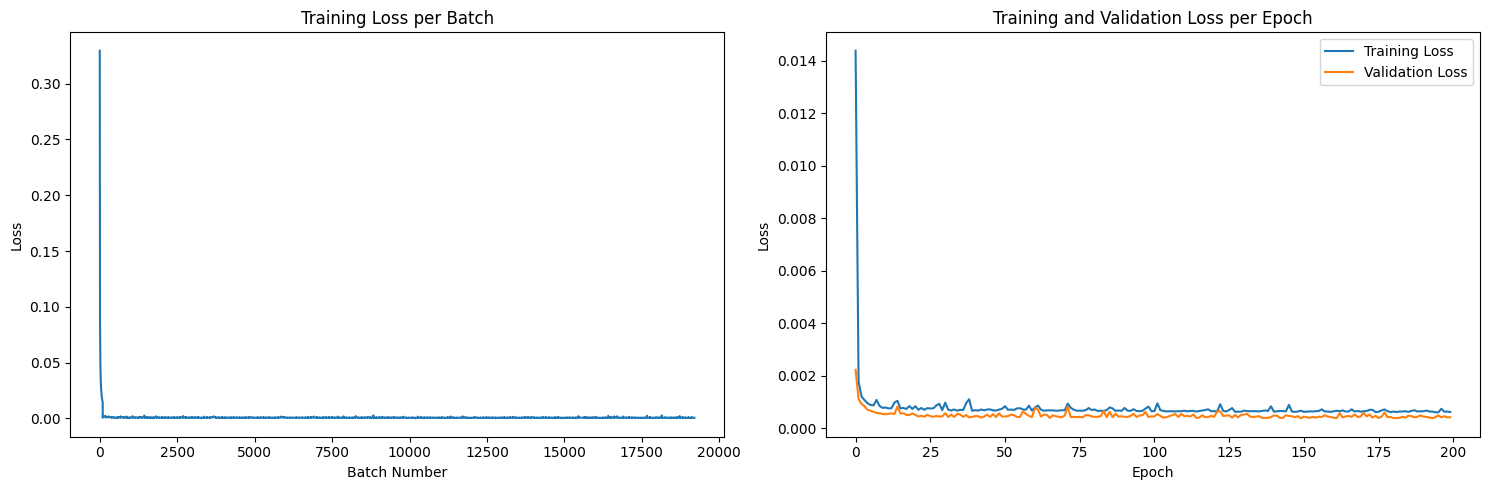

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

Test Results:
PSNR: 36.998550792092644
SSIM: 0.9598657786706113


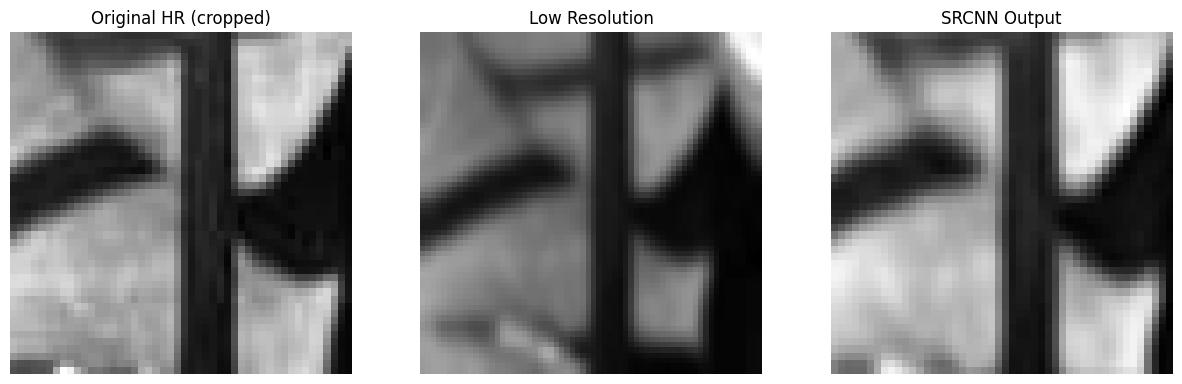

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# کلاس Callback برای ذخیره Loss هر Batch
class BatchLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        if batch % 10 == 0:  # چاپ هر 10 Batch
            print(f"Batch {batch} - Training Loss: {logs['loss']:.4f}")

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),  # لایه جدید 3x3
    layers.Conv2D(1, (3, 3), activation='linear', padding='valid')   # لایه خروجی با kernel کوچکتر
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل با Validation Split و Callback
batch_loss_callback = BatchLossCallback()
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=200,
    verbose=2,
    validation_split=0.2,
    callbacks=[batch_loss_callback]
)

# رسم نمودار Lossها
plt.figure(figsize=(15, 5))

# نمودار Loss هر Batch
plt.subplot(1, 2, 1)
plt.plot(batch_loss_callback.batch_losses)
plt.title('Training Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')

# نمودار Loss و Validation Loss هر Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("\nTest Results:")
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# کلاس Callback برای ذخیره Loss هر Batch
class BatchLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        if batch % 10 == 0:  # چاپ هر 10 Batch
            print(f"Batch {batch} - Training Loss: {logs['loss']:.4f}")

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN پیشرفته با Residual Connections
def build_deep_srcnn(input_shape=(64, 64, 1)):
    # لایه ورودی
    inputs = layers.Input(shape=input_shape)

    # بلوک اول: استخراج ویژگی‌های پایه
    x = layers.Conv2D(64, (9, 9), activation='relu', padding='valid')(inputs)
    x = layers.BatchNormalization()(x)

    # بلوک دوم: ویژگی‌های میانی
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='valid')(x)
    x = layers.Dropout(0.2)(x)

    # بلوک سوم: اتصال باقیمانده
    residual = x  # ذخیره tensor برای اتصال باقیمانده
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.add([x, residual])  # اتصال باقیمانده صحیح

    # بلوک چهارم: آماده‌سازی برای خروجی
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='valid')(x)

    # لایه خروجی
    outputs = layers.Conv2D(1, (3, 3), activation='linear', padding='valid')(x)

    return models.Model(inputs, outputs)

# ایجاد مدل
model = build_deep_srcnn()

model.compile(optimizer='adam', loss='mse')

# آموزش مدل با Validation Split و Callback
batch_loss_callback = BatchLossCallback()
history = model.fit(
    x_train,
    y_train,
    batch_size=4,
    epochs=200,
    verbose=2,
    validation_split=0.2,
    callbacks=[batch_loss_callback]
)

# رسم نمودار Lossها
plt.figure(figsize=(15, 5))

# نمودار Loss هر Batch
plt.subplot(1, 2, 1)
plt.plot(batch_loss_callback.batch_losses)
plt.title('Training Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')

# نمودار Loss و Validation Loss هر Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("\nTest Results:")
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

Epoch 1/200


ValueError: Dimensions must be equal, but are 48 and 46 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, functional_1_1/conv2d_16_1/Add)' with input shapes: [?,48,48,1], [?,46,46,1].